# AN2VEC colors results

In [1]:
import itertools

import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
results = []
for nnodes in [1000]:
    for sharedl1 in [True, False]:
        for decadjdeep in [True, False]:
            df = pd.read_csv('../../data/behaviour/colors/nnodes={nnodes}-'
                             'sharedl1={sharedl1}-decadjdeep={decadjdeep}-'
                             'model=ov_noov-correlation=0:0.1:1-dimxi=10:2:20-nsamples=20.csv.gz'
                             .format(nnodes=nnodes, sharedl1=str(sharedl1).lower(),
                                     decadjdeep=str(decadjdeep).lower()),
                             compression='gzip')
            results.append(df)
results = pd.concat(results, ignore_index=True)

In [3]:
results['adj+feat'] = results['adj'] + results['feat']

best_total = results\
    .groupby(['nnodes', 'sharedl1', 'decadjdeep', 'model', 'correlation', 'dimξ', 'sample'])\
    .apply(lambda x: x.loc[x.total.idxmin()])\
    .reset_index(drop=True)
best_total_long = pd.melt(best_total,
                          id_vars=['nnodes', 'sharedl1', 'decadjdeep', 'model',
                                   'correlation', 'dimξ', 'sample', 'epoch'],
                          var_name='loss', value_name='best total')

maxdimξ = best_total.dimξ.max()
loss_parts = ['adj', 'feat', 'adj+feat', 'total', 'reg', 'kl']
best_total_rel = best_total.copy()
best_total_rel[loss_parts] = best_total\
    .groupby(['nnodes', 'sharedl1', 'decadjdeep', 'model', 'correlation'])\
    .apply(lambda x: x / x[x.dimξ == maxdimξ].mean())[loss_parts]
best_total_rel_long = pd.melt(best_total_rel.reset_index(),
                              id_vars=['nnodes', 'sharedl1', 'decadjdeep', 'model',
                                       'correlation', 'dimξ', 'sample', 'epoch'],
                              var_name='loss', value_name='best total')

Absolute

/home/sl/.conda/envs/base36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


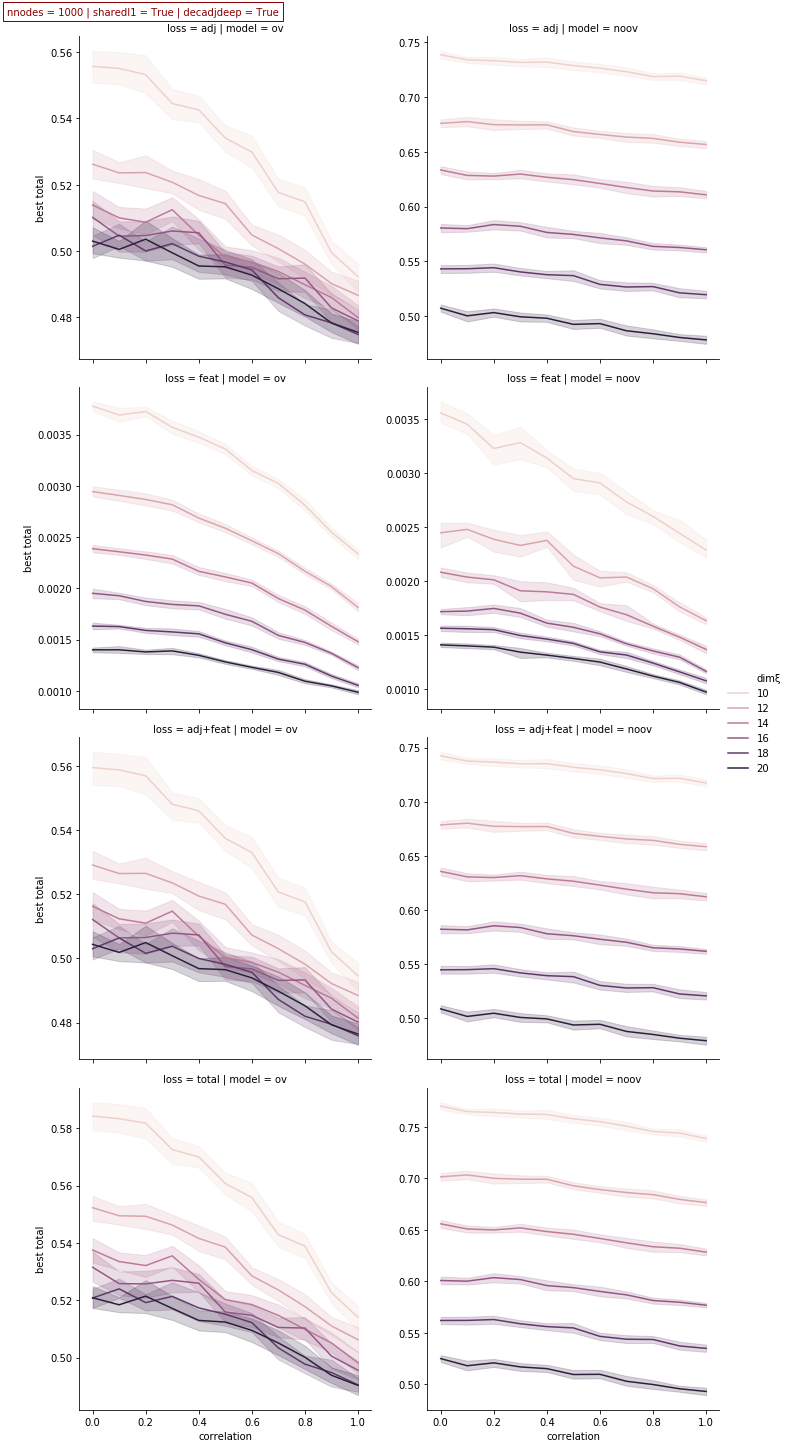

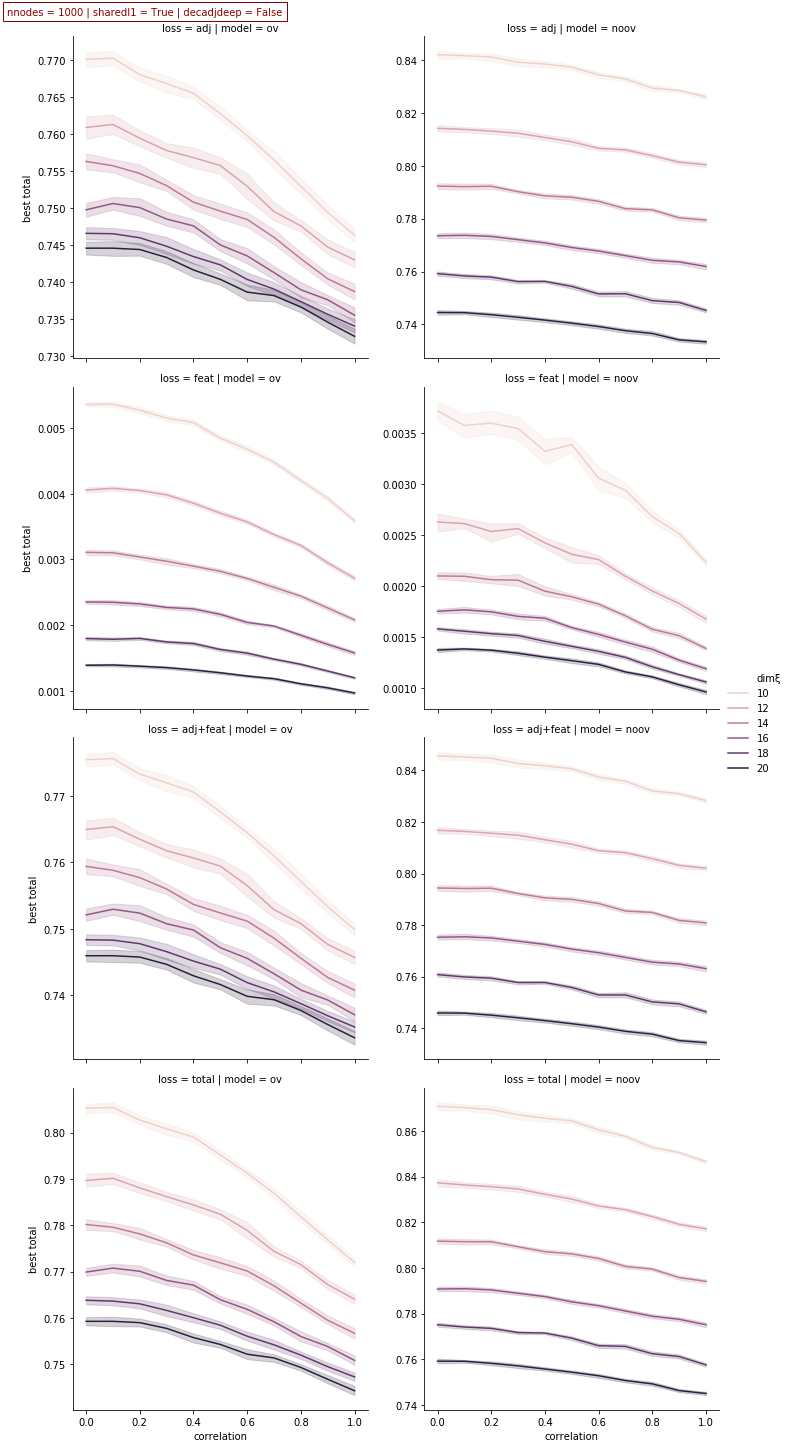

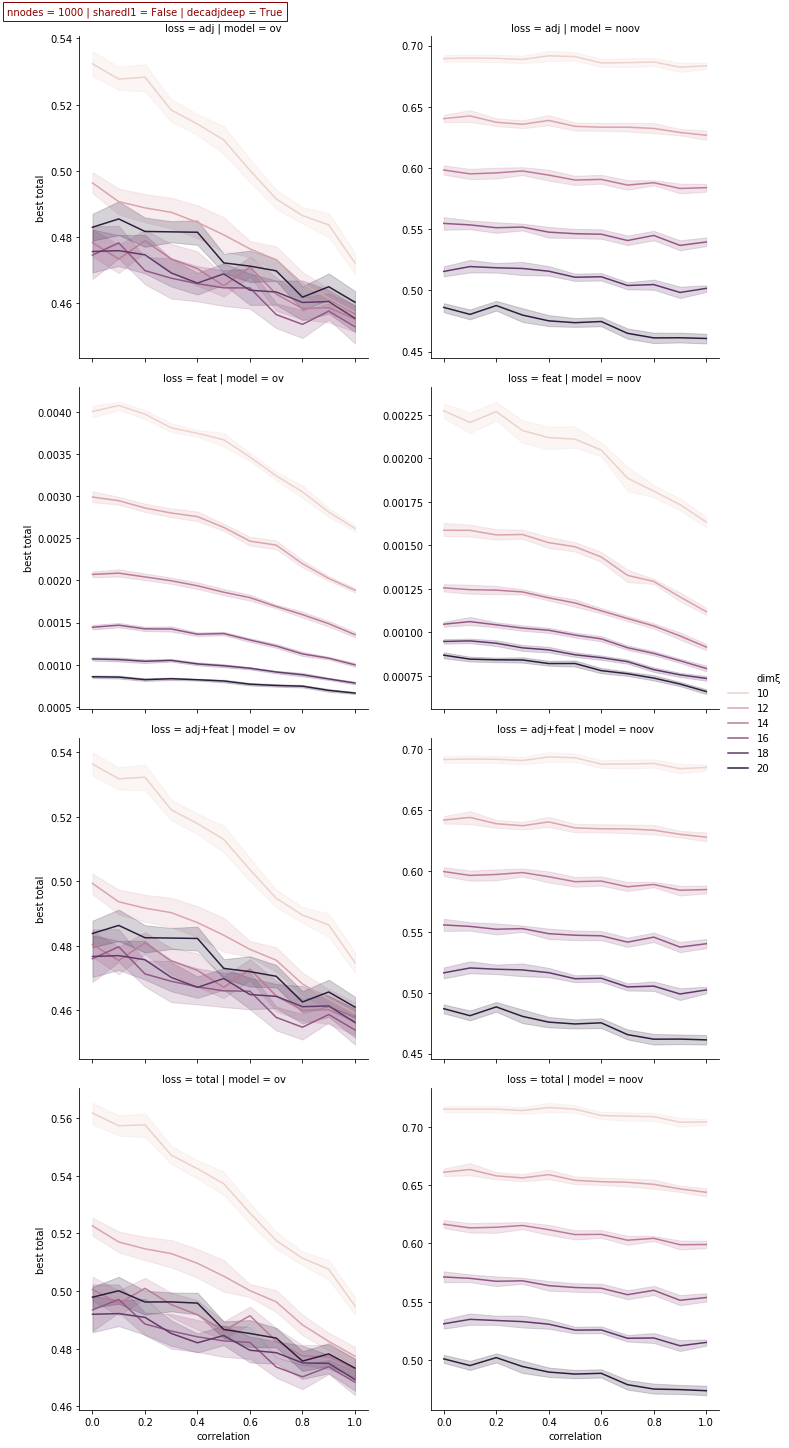

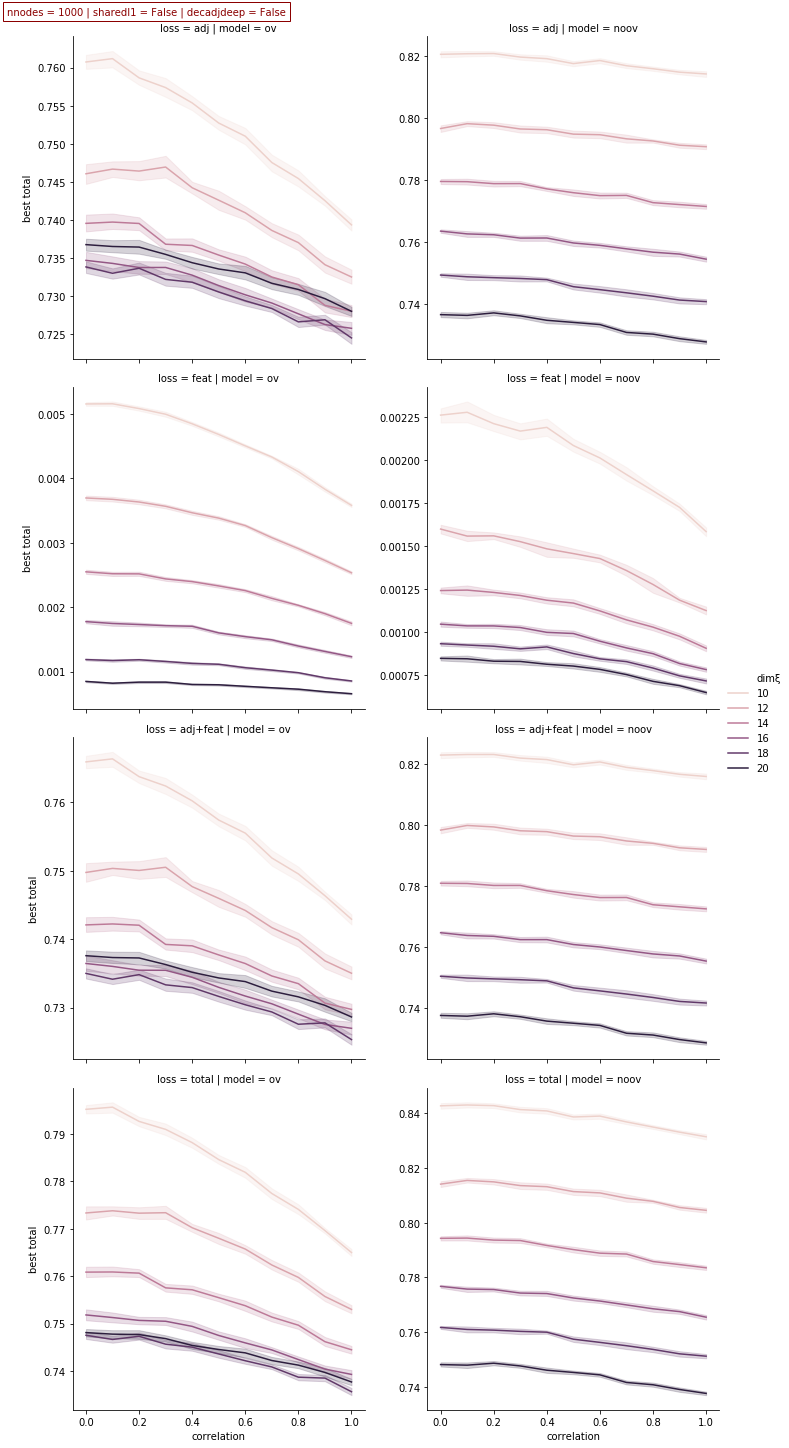

In [4]:
for nnodes, sharedl1, decadjdeep in itertools.product([1000], [True, False], [True, False]):
    facet_grid = sb.relplot(x='correlation', y='best total',
                            hue='dimξ', col='model', col_order=['ov', 'noov'],
                            row='loss', row_order=['adj', 'feat', 'adj+feat', 'total'],
                            data=best_total_long[(best_total_long.nnodes == 1000)
                                                 & (best_total_long.sharedl1 == sharedl1)
                                                 & (best_total_long.decadjdeep == decadjdeep)],
                            kind='line', legend='full', facet_kws={'sharey': False})
    facet_grid.fig.text(0, 1, 'nnodes = {} | sharedl1 = {} | decadjdeep = {}'.format(nnodes, sharedl1, decadjdeep),
                        color='darkred', ha='left', va='center',
                        bbox={'edgecolor': 'darkred', 'facecolor': "#00000000"})

Relative

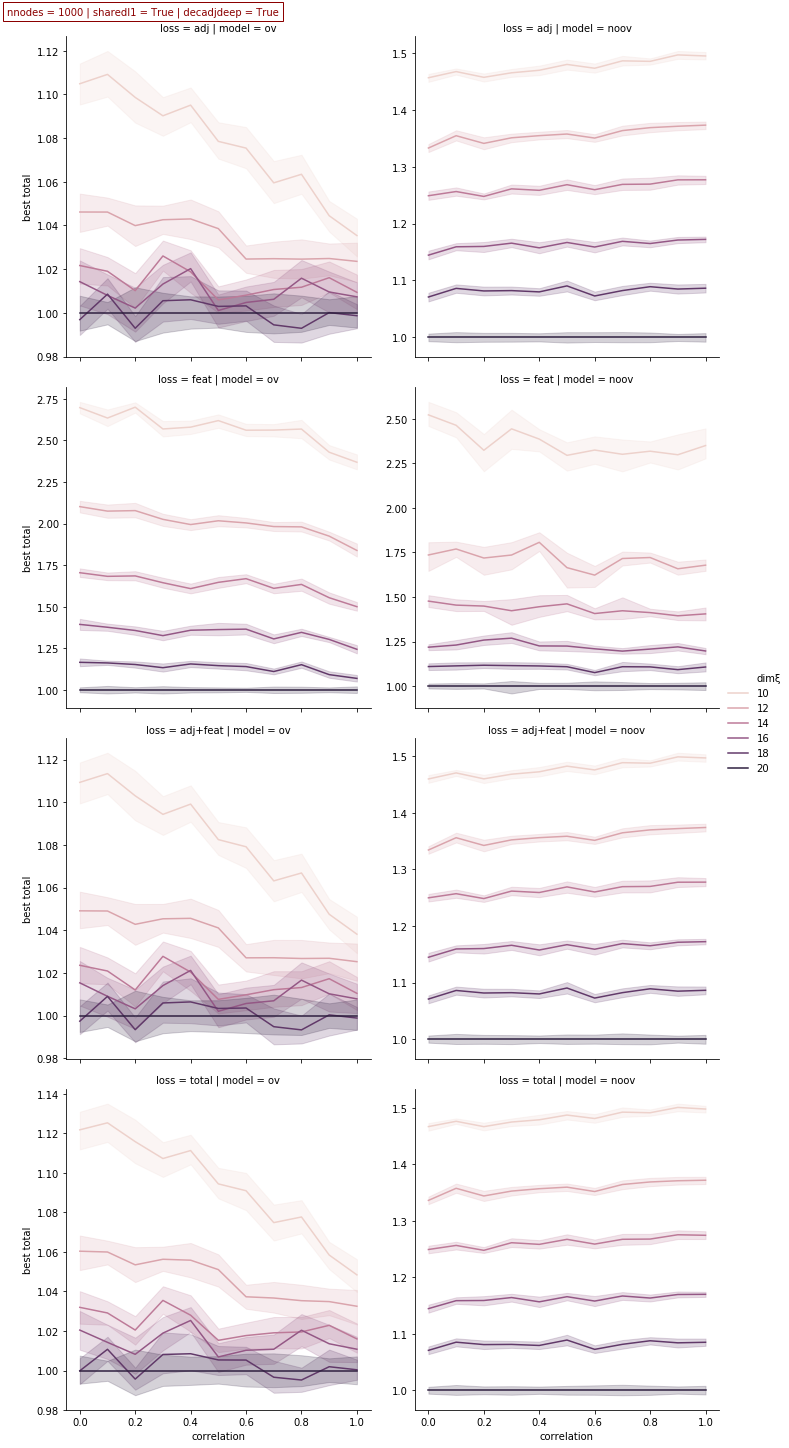

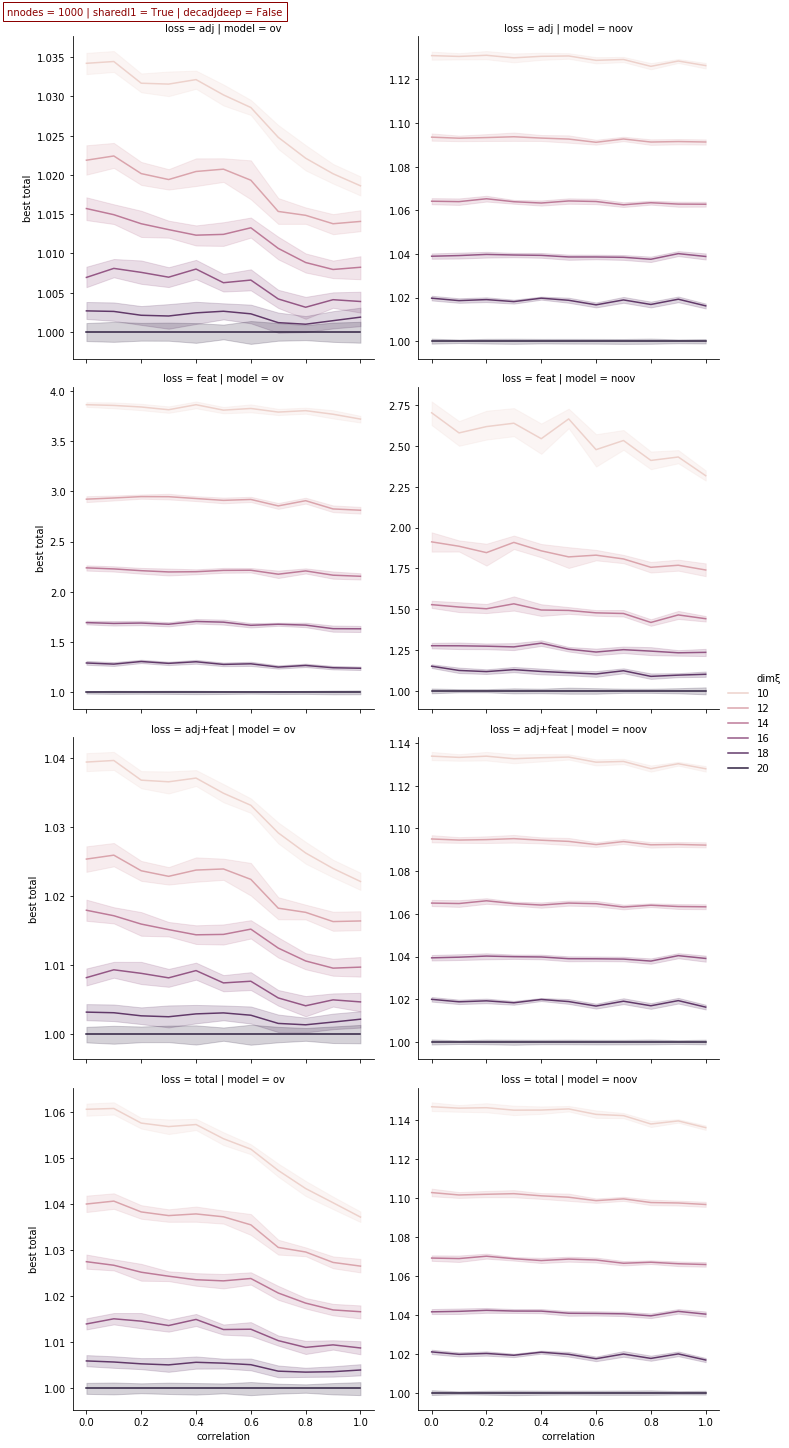

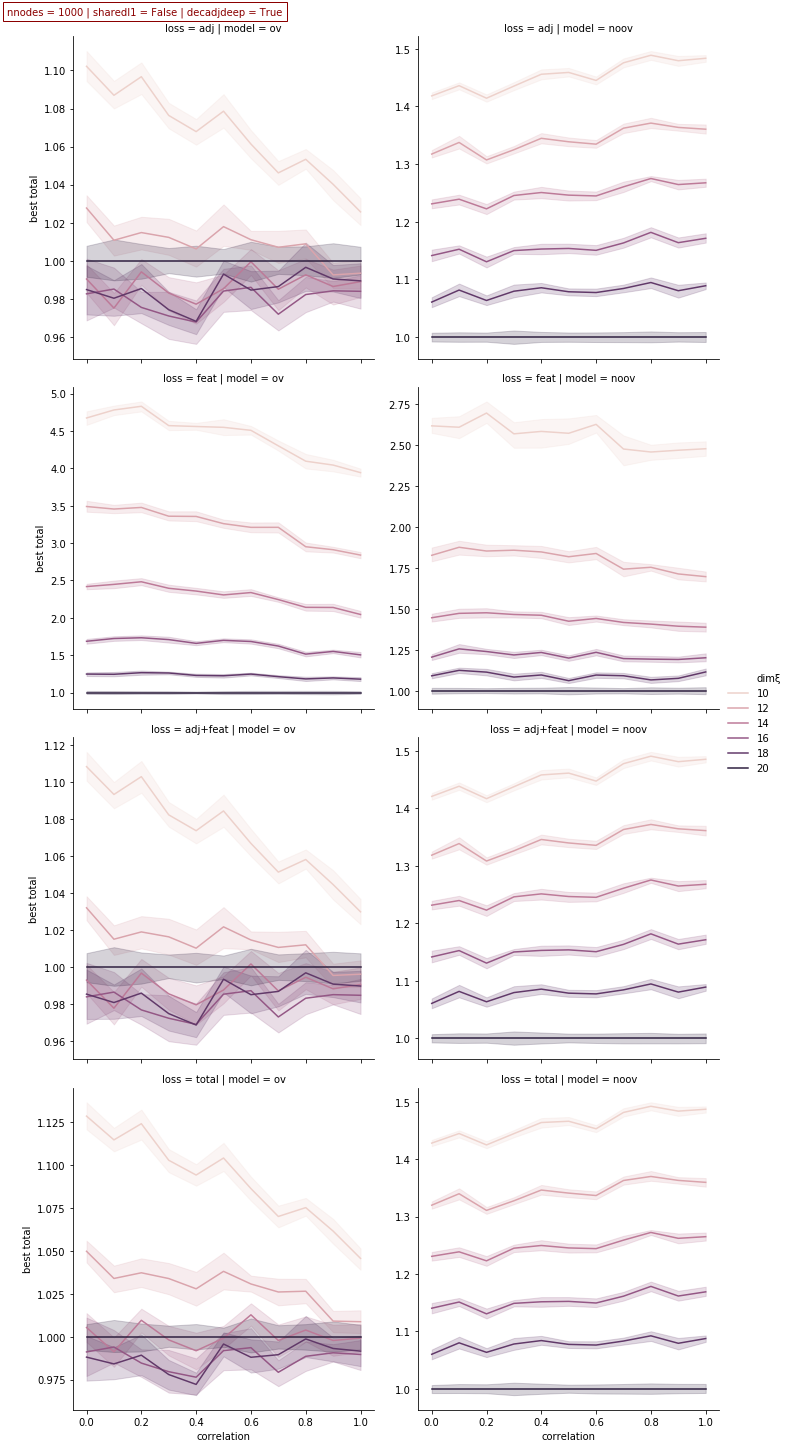

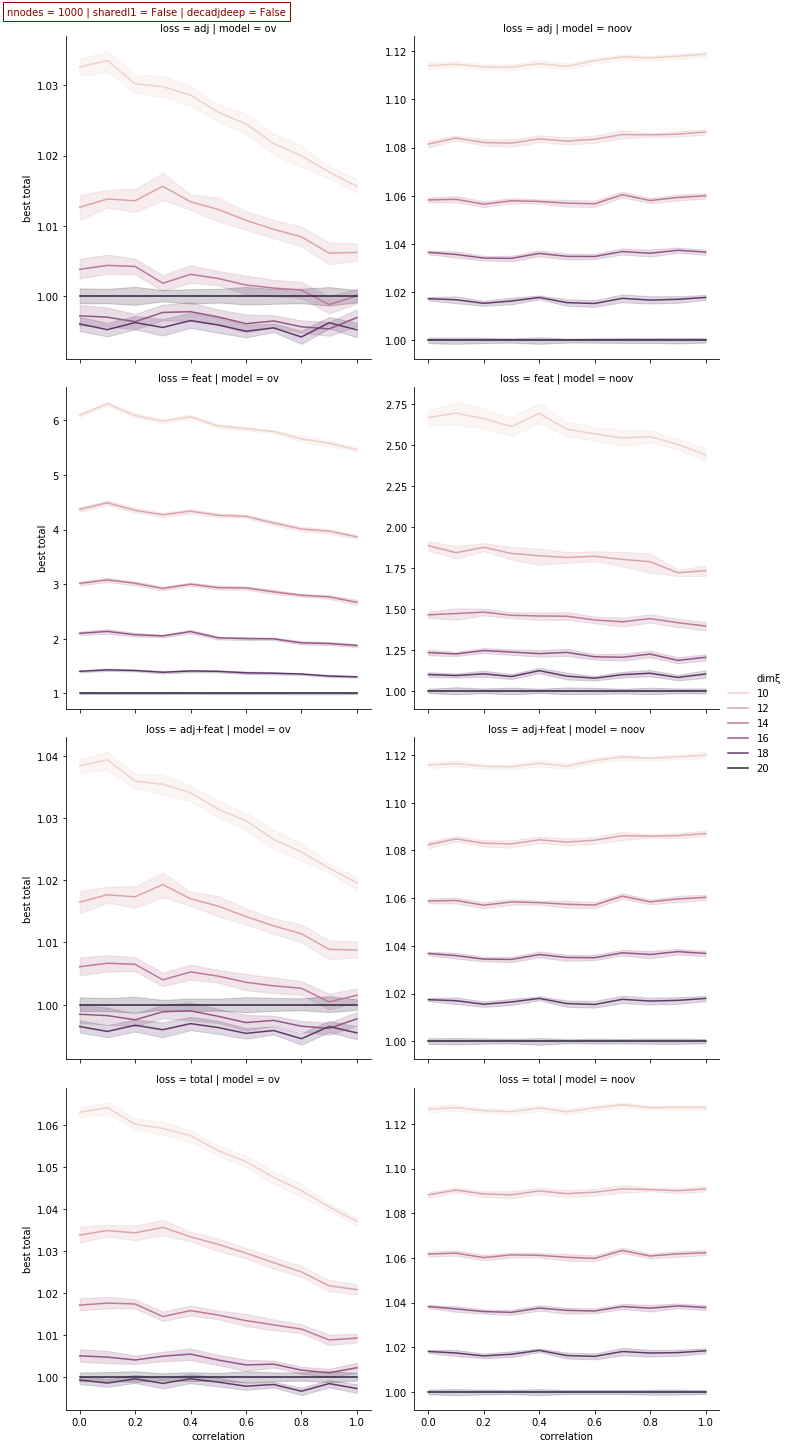

In [5]:
for nnodes, sharedl1, decadjdeep in itertools.product([1000], [True, False], [True, False]):
    facet_grid = sb.relplot(x='correlation', y='best total',
                            hue='dimξ', col='model', col_order=['ov', 'noov'],
                            row='loss', row_order=['adj', 'feat', 'adj+feat', 'total'],
                            data=best_total_rel_long[(best_total_rel_long.nnodes == 1000)
                                                     & (best_total_rel_long.sharedl1 == sharedl1)
                                                     & (best_total_rel_long.decadjdeep == decadjdeep)],
                            kind='line', legend='full', facet_kws={'sharey': False})
    facet_grid.fig.text(0, 1, 'nnodes = {} | sharedl1 = {} | decadjdeep = {}'.format(nnodes, sharedl1, decadjdeep),
                        color='darkred', ha='left', va='center',
                        bbox={'edgecolor': 'darkred', 'facecolor': "#00000000"})